# SET UP

In [1]:
%pip install ipython
%pip install seaborn
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#%pip install beautifulsoup4 #Didn't used

In [3]:
%pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [4]:
 !pip install fastf1  #gives lap timing,car telemetry,position,tyre data,weather data,the event schedule and session

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import fastf1 as ff1
from fastf1 import plotting #team names and colors
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
from matplotlib import cm
import fastf1 as ff1
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
plotting.setup_mpl()
from timple.timedelta import strftimedelta
import warnings
warnings.filterwarnings('ignore')  

pd.set_option('display.max_columns', None)

In [6]:
import requests as req

from bs4 import BeautifulSoup as bs

In [7]:
import time

In [8]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [9]:
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

In [10]:
PATH=ChromeDriverManager().install()   # instalation in driver

driver=webdriver.Chrome(PATH)         # open in chrome

driver.get('https://www.google.es')

logger         INFO 	====== WebDriver manager ======
logger         INFO 	Get LATEST chromedriver version for google-chrome 107.0.5304
logger         INFO 	Driver [/Users/juliasabatel/.wdm/drivers/chromedriver/mac64/107.0.5304/chromedriver] found in cache


In [11]:
ff1.Cache.enable_cache('./cache/')

In [12]:
plotting.setup_mpl()

In [13]:
#data importation: 1st method:download csv

In [14]:
circuits = pd.read_csv('./f1_database/circuits.csv', encoding='latin1')
circuits2 = circuits.copy() 

In [15]:
constructor_results = pd.read_csv('./f1_database/constructor_results.csv', encoding='latin1')
constructor_results2 = constructor_results.copy() 

In [16]:
constructor_standings = pd.read_csv('./f1_database/constructor_standings.csv', encoding='latin1')
constructor_standings2 = constructor_standings.copy() 

In [17]:
constructors = pd.read_csv('./f1_database/constructors.csv', encoding='latin1')
constructors2 = constructors.copy() 

In [18]:
driver_standings = pd.read_csv('./f1_database/driver_standings.csv', encoding='latin1')
driver_standings2 = driver_standings.copy() 

In [19]:
drivers = pd.read_csv('./f1_database/drivers.csv', encoding='latin1')
drivers2 = drivers.copy() 

In [20]:
lap_times = pd.read_csv('./f1_database/lap_times.csv', encoding='latin1')
lap_times2 = lap_times.copy() 

In [21]:
pit_stops = pd.read_csv('./f1_database/pit_stops.csv', encoding='latin1')
pit_stops2 = pit_stops.copy() 

In [22]:
races = pd.read_csv('./f1_database/races.csv', encoding='latin1')
races2 = races.copy() 

In [23]:
results = pd.read_csv('./f1_database/results.csv', encoding='latin1')
results2 = results.copy() 

In [24]:
seasons = pd.read_csv('./f1_database/seasons.csv', encoding='latin1')
seasons2 = seasons.copy() 

In [25]:
sprint_results= pd.read_csv('./f1_database/sprint_results.csv', encoding='latin1')
sprint_results2 = sprint_results.copy() 

In [26]:
status = pd.read_csv('./f1_database/status.csv', encoding='latin1')
status2 = status.copy() 

# SCRAPING

In [27]:
url='https://es.motorsport.com/f1/results/2021/gp-de-abu-dhabi-483612/?st=GRID' #segundo método:Selenium

In [28]:
driver=webdriver.Chrome(PATH)

driver.get(url)

In [29]:
tabla=driver.find_element(By.TAG_NAME, 'tbody') #Se obtienen los elementos de la tabla

filas=tabla.find_elements(By.TAG_NAME, 'tr')


data=[]


for f in filas:
    
    elemen=f.find_elements(By.TAG_NAME, 'td')
    
    tmp=[]
    
    for e in elemen:
        
        tmp.append(e.text)
        
    data.append(tmp)

    
data

[['1',
  '33',
  'Max Verstappen',
  '',
  'Red Bull',
  'Honda',
  "1'22.109",
  '',
  '231.541'],
 ['2',
  '44',
  'Lewis Hamilton',
  '',
  'Mercedes',
  'Mercedes',
  "1'22.480",
  '0.371',
  '230.499'],
 ['3',
  '4',
  'Lando Norris',
  '',
  'McLaren',
  'Mercedes',
  "1'22.931",
  '0.822',
  '229.245'],
 ['4',
  '11',
  'Sergio Pérez',
  '',
  'Red Bull',
  'Honda',
  "1'22.947",
  '0.838',
  '229.201'],
 ['5',
  '55',
  'Carlos Sainz Jr.',
  '',
  'Ferrari',
  'Ferrari',
  "1'22.992",
  '0.883',
  '229.077'],
 ['6',
  '77',
  'Valtteri Bottas',
  '',
  'Mercedes',
  'Mercedes',
  "1'23.036",
  '0.927',
  '228.956'],
 ['7',
  '16',
  'Charles Leclerc',
  '',
  'Ferrari',
  'Ferrari',
  "1'23.122",
  '1.013',
  '228.719'],
 ['8',
  '22',
  'Yuki Tsunoda',
  '',
  'AlphaTauri',
  'Honda',
  "1'23.220",
  '1.111',
  '228.449'],
 ['9',
  '31',
  'Esteban Ocon',
  '',
  'Alpine',
  'Renault',
  "1'23.389",
  '1.280',
  '227.986'],
 ['10',
  '3',
  'Daniel Ricciardo',
  '',
  'McLaren

In [30]:
data=[[e.text for e in f.find_elements(By.TAG_NAME, 'td')] 
      for f in tabla.find_elements(By.TAG_NAME, 'tr')]

data

[['1',
  '33',
  'Max Verstappen',
  '',
  'Red Bull',
  'Honda',
  "1'22.109",
  '',
  '231.541'],
 ['2',
  '44',
  'Lewis Hamilton',
  '',
  'Mercedes',
  'Mercedes',
  "1'22.480",
  '0.371',
  '230.499'],
 ['3',
  '4',
  'Lando Norris',
  '',
  'McLaren',
  'Mercedes',
  "1'22.931",
  '0.822',
  '229.245'],
 ['4',
  '11',
  'Sergio Pérez',
  '',
  'Red Bull',
  'Honda',
  "1'22.947",
  '0.838',
  '229.201'],
 ['5',
  '55',
  'Carlos Sainz Jr.',
  '',
  'Ferrari',
  'Ferrari',
  "1'22.992",
  '0.883',
  '229.077'],
 ['6',
  '77',
  'Valtteri Bottas',
  '',
  'Mercedes',
  'Mercedes',
  "1'23.036",
  '0.927',
  '228.956'],
 ['7',
  '16',
  'Charles Leclerc',
  '',
  'Ferrari',
  'Ferrari',
  "1'23.122",
  '1.013',
  '228.719'],
 ['8',
  '22',
  'Yuki Tsunoda',
  '',
  'AlphaTauri',
  'Honda',
  "1'23.220",
  '1.111',
  '228.449'],
 ['9',
  '31',
  'Esteban Ocon',
  '',
  'Alpine',
  'Renault',
  "1'23.389",
  '1.280',
  '227.986'],
 ['10',
  '3',
  'Daniel Ricciardo',
  '',
  'McLaren

In [31]:
cabeceras=driver.find_element(By.TAG_NAME, 'thead') #extraemos las cabeceras

cabeceras=[c.text for c in cabeceras.find_elements(By.TAG_NAME, 'th')]

driver.quit()

cabeceras

['Cla', '#', 'Piloto', '', 'Chasis', 'Motor', 'Tiempo', 'Diferencia', 'Km/h']

In [73]:
df_starting_grid=pd.DataFrame(data, columns=cabeceras)

df_starting_grid #parrilla de salida

,Cla,#,Piloto,,Chasis,Motor,Tiempo,Diferencia,Km/h
0,1,33,Max Verstappen,,Red Bull,Honda,1'22.109,,231.541
1,2,44,Lewis Hamilton,,Mercedes,Mercedes,1'22.480,0.371,230.499
2,3,4,Lando Norris,,McLaren,Mercedes,1'22.931,0.822,229.245
3,4,11,Sergio Pérez,,Red Bull,Honda,1'22.947,0.838,229.201
4,5,55,Carlos Sainz Jr.,,Ferrari,Ferrari,1'22.992,0.883,229.077
5,6,77,Valtteri Bottas,,Mercedes,Mercedes,1'23.036,0.927,228.956
6,7,16,Charles Leclerc,,Ferrari,Ferrari,1'23.122,1.013,228.719
7,8,22,Yuki Tsunoda,,AlphaTauri,Honda,1'23.220,1.111,228.449
8,9,31,Esteban Ocon,,Alpine,Renault,1'23.389,1.280,227.986
9,10,3,Daniel Ricciardo,,McLaren,Mercedes,1'23.409,1.300,227.932


In [33]:
#extracción 3º fuente información: duración de los pits stop

In [34]:
abu_dhabi_race = ff1.get_session(2021, 'Abu Dhabi', 'R')
print(abu_dhabi_race .date) #para encontrar el dia exacto de la carrera y buscar info

2021-12-12 00:00:00


In [35]:
#url1='https://www.formula1.com/en/results.html/2021/races/1107/abu-dhabi/pit-stop-summary.html'#tercera fuente de informacion


In [36]:
#driver=webdriver.Chrome(PATH)

#driver.get(url1)

In [51]:
#tabla2=driver.find_element(By.TAG_NAME, 'tbody') #Se obtienen los elementos de la tabla

#filas2=tabla2.find_elements(By.TAG_NAME, 'tr')

#time.sleep(3)

#data2=[]


#for f in filas2:
    
    #elemen=f.find_elements(By.TAG_NAME, 'td')
    
    #tmp2=[]
    
    #for e in elemen:
        
        #tmp2.append(e.text)
        
    #data2.append(tmp)

    
#data2

In [52]:
#cabeceras2=driver.find_element(By.TAG_NAME, 'thead') #extraemos las cabeceras

#cabeceras2=[c.text for c in cabeceras2.find_elements(By.TAG_NAME, 'th')]

#driver.quit()

#cabeceras2

In [53]:
df_pit_stop=pd.read_clipboard()
df_pit_stop #pits stop

,STOPS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,TOTAL
0,1,47,Mick Schumacher,HAAS FERRARI,10,17:18:55,22.124,22.124
1,1,33,Max Verstappen,RED BULL RACING HONDA,13,17:22:42,21.152,21.152
2,1,44,Lewis Hamilton,MERCEDES,14,17:24:04,21.595,21.595
3,1,16,Charles Leclerc,FERRARI,15,17:26:08,22.461,22.461
4,1,31,Esteban Ocon,ALPINE RENAULT,15,17:26:13,21.677,21.677
5,1,4,Lando Norris,MCLAREN MERCEDES,17,17:29:04,21.380,21.380
6,1,99,Antonio Giovinazzi,ALFA ROMEO RACING FERRARI,17,17:29:20,22.283,22.283
7,1,3,Daniel Ricciardo,MCLAREN MERCEDES,18,17:30:47,21.449,21.449
8,1,55,Carlos Sainz,FERRARI,19,17:31:59,22.213,22.213
9,1,11,Sergio Perez,RED BULL RACING HONDA,21,17:34:55,21.471,21.471


In [62]:
df_pit_stop.to_excel('../Desktop/arc.xlsx')

In [55]:
#df_pit_stops=pd.DataFrame(data2, columns=cabeceras2)

#df_pit_stops #pits stop

In [45]:
#Cumplido: 3 fuentes de información y 2 métodos de extracción. Seguimos obteniendo información relevante

In [46]:
url3 = 'https://www.formula1.com/en/results.html/2021/races/1107/abu-dhabi/fastest-laps.html'

In [47]:
driver=webdriver.Chrome(PATH)

driver.get(url3)

In [48]:
tabla3=driver.find_element(By.TAG_NAME, 'tbody') #Se obtienen los elementos de la tabla

time.sleep(3)

filas3=tabla3.find_elements(By.TAG_NAME, 'tr')

time.sleep(3)

data3=[]


for f in filas3:
    
    time.sleep(3) #duerme, esperas aqui 3 seg
    
    elemen=f.find_elements(By.TAG_NAME, 'td')
    
    tmp3=[]
    
    for e in elemen:
        
        tmp3.append(e.text)
        
    data3.append(tmp3)

    
data3

[['',
  '1',
  '33',
  'Max Verstappen',
  'RED BULL RACING HONDA',
  '39',
  '18:02:08',
  '1:26.103',
  '220.800',
  ''],
 ['',
  '2',
  '11',
  'Sergio Perez',
  'RED BULL RACING HONDA',
  '51',
  '18:19:56',
  '1:26.419',
  '219.993',
  ''],
 ['',
  '3',
  '44',
  'Lewis Hamilton',
  'MERCEDES',
  '43',
  '18:07:40',
  '1:26.615',
  '219.495',
  ''],
 ['',
  '4',
  '4',
  'Lando Norris',
  'MCLAREN MERCEDES',
  '58',
  '18:34:38',
  '1:26.762',
  '219.123',
  ''],
 ['',
  '5',
  '77',
  'Valtteri Bottas',
  'MERCEDES',
  '51',
  '18:20:28',
  '1:26.862',
  '218.871',
  ''],
 ['',
  '6',
  '10',
  'Pierre Gasly',
  'ALPHATAURI HONDA',
  '49',
  '18:17:43',
  '1:27.342',
  '217.668',
  ''],
 ['',
  '7',
  '22',
  'Yuki Tsunoda',
  'ALPHATAURI HONDA',
  '50',
  '18:19:08',
  '1:27.496',
  '217.285',
  ''],
 ['',
  '8',
  '14',
  'Fernando Alonso',
  'ALPINE RENAULT',
  '58',
  '18:34:40',
  '1:27.607',
  '217.010',
  ''],
 ['',
  '9',
  '55',
  'Carlos Sainz',
  'FERRARI',
  '51',
  '

In [49]:
cabeceras3=driver.find_element(By.TAG_NAME, 'thead') #extraemos las cabeceras

cabeceras3=[c.text for c in cabeceras3.find_elements(By.TAG_NAME, 'th')]

driver.quit()

cabeceras3

['',
 'POS',
 'NO',
 'DRIVER',
 'CAR',
 'LAP',
 'TIME OF DAY',
 'TIME',
 'AVG SPEED',
 '']

In [50]:
df_race_results=pd.DataFrame(data3, columns=cabeceras3)

df_race_results #resultados de la carrera

,,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED,
0,,1,33,Max Verstappen,RED BULL RACING HONDA,39,18:02:08,1:26.103,220.800,
1,,2,11,Sergio Perez,RED BULL RACING HONDA,51,18:19:56,1:26.419,219.993,
2,,3,44,Lewis Hamilton,MERCEDES,43,18:07:40,1:26.615,219.495,
3,,4,4,Lando Norris,MCLAREN MERCEDES,58,18:34:38,1:26.762,219.123,
4,,5,77,Valtteri Bottas,MERCEDES,51,18:20:28,1:26.862,218.871,
5,,6,10,Pierre Gasly,ALPHATAURI HONDA,49,18:17:43,1:27.342,217.668,
6,,7,22,Yuki Tsunoda,ALPHATAURI HONDA,50,18:19:08,1:27.496,217.285,
7,,8,14,Fernando Alonso,ALPINE RENAULT,58,18:34:40,1:27.607,217.010,
8,,9,55,Carlos Sainz,FERRARI,51,18:20:24,1:27.618,216.982,
9,,10,31,Esteban Ocon,ALPINE RENAULT,58,18:34:43,1:28.249,215.431,


In [56]:
url5='https://www.formula1.com/en/results.html/2021/races/1107/abu-dhabi/fastest-laps.html'

In [57]:
driver=webdriver.Chrome(PATH)

driver.get(url5)

In [59]:
tabla5=driver.find_element(By.TAG_NAME, 'tbody') #Se obtienen los elementos de la tabla

time.sleep(3)

filas5=tabla5.find_elements(By.TAG_NAME, 'tr')

time.sleep(3)

data5=[]


for f in filas5:
    
    time.sleep(3) #duerme, esperas aqui 3 seg
    
    elemen=f.find_elements(By.TAG_NAME, 'td')
    
    tmp5=[]
    
    for e in elemen:
        
        tmp5.append(e.text)
        
    data5.append(tmp5)
    
data5

[['',
  '1',
  '33',
  'Max Verstappen',
  'RED BULL RACING HONDA',
  '39',
  '18:02:08',
  '1:26.103',
  '220.800',
  ''],
 ['',
  '2',
  '11',
  'Sergio Perez',
  'RED BULL RACING HONDA',
  '51',
  '18:19:56',
  '1:26.419',
  '219.993',
  ''],
 ['',
  '3',
  '44',
  'Lewis Hamilton',
  'MERCEDES',
  '43',
  '18:07:40',
  '1:26.615',
  '219.495',
  ''],
 ['',
  '4',
  '4',
  'Lando Norris',
  'MCLAREN MERCEDES',
  '58',
  '18:34:38',
  '1:26.762',
  '219.123',
  ''],
 ['',
  '5',
  '77',
  'Valtteri Bottas',
  'MERCEDES',
  '51',
  '18:20:28',
  '1:26.862',
  '218.871',
  ''],
 ['',
  '6',
  '10',
  'Pierre Gasly',
  'ALPHATAURI HONDA',
  '49',
  '18:17:43',
  '1:27.342',
  '217.668',
  ''],
 ['',
  '7',
  '22',
  'Yuki Tsunoda',
  'ALPHATAURI HONDA',
  '50',
  '18:19:08',
  '1:27.496',
  '217.285',
  ''],
 ['',
  '8',
  '14',
  'Fernando Alonso',
  'ALPINE RENAULT',
  '58',
  '18:34:40',
  '1:27.607',
  '217.010',
  ''],
 ['',
  '9',
  '55',
  'Carlos Sainz',
  'FERRARI',
  '51',
  '

In [60]:
cabeceras5=driver.find_element(By.TAG_NAME, 'thead') #extraemos las cabeceras

cabeceras5=[c.text for c in cabeceras5.find_elements(By.TAG_NAME, 'th')]

driver.quit()

cabeceras5

['',
 'POS',
 'NO',
 'DRIVER',
 'CAR',
 'LAP',
 'TIME OF DAY',
 'TIME',
 'AVG SPEED',
 '']

In [70]:
df_fastest_lap=pd.DataFrame(data5, columns=cabeceras5)

df_fastest_lap #vuelta rápida

,,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED,
0,,1,33,Max Verstappen,RED BULL RACING HONDA,39,18:02:08,1:26.103,220.800,
1,,2,11,Sergio Perez,RED BULL RACING HONDA,51,18:19:56,1:26.419,219.993,
2,,3,44,Lewis Hamilton,MERCEDES,43,18:07:40,1:26.615,219.495,
3,,4,4,Lando Norris,MCLAREN MERCEDES,58,18:34:38,1:26.762,219.123,
4,,5,77,Valtteri Bottas,MERCEDES,51,18:20:28,1:26.862,218.871,
5,,6,10,Pierre Gasly,ALPHATAURI HONDA,49,18:17:43,1:27.342,217.668,
6,,7,22,Yuki Tsunoda,ALPHATAURI HONDA,50,18:19:08,1:27.496,217.285,
7,,8,14,Fernando Alonso,ALPINE RENAULT,58,18:34:40,1:27.607,217.010,
8,,9,55,Carlos Sainz,FERRARI,51,18:20:24,1:27.618,216.982,
9,,10,31,Esteban Ocon,ALPINE RENAULT,58,18:34:43,1:28.249,215.431,


# EXPLORATION AND CLEANING

In [71]:
#df_parrilla_salida : STARTING_GRID
#df_pit_stop : PIT STOP
#df_race_results : RACE_RESULTS
#fastest_lap : FASTEST_LAP



#Mismo nombres de columnas

In [83]:
df_starting_grid.columns#no null values or duplicated

Index(['Cla', '#', 'Piloto', '', 'Chasis', 'Motor', 'Tiempo', 'Diferencia',
       'Km/h'],
      dtype='object')

In [86]:
STARTING_GRID= df_starting_grid.rename(columns={'Cla':'STARTING_POSITION',
                                   '#':'NO','Piloto':'DRIVER','Chasis':'CHASIS','Motor':'MOTOR','Tiempo':'GRID_TIME','Diferencia':'GRID_DIFERENCE','Km/h':'KM/H'})
STARTING_GRID

,STARTING_POSITION,NO,DRIVER,,CHASIS,MOTOR,GRID_TIME,GRID_DIFERENCE,KM/H
0,1,33,Max Verstappen,,Red Bull,Honda,1'22.109,,231.541
1,2,44,Lewis Hamilton,,Mercedes,Mercedes,1'22.480,0.371,230.499
2,3,4,Lando Norris,,McLaren,Mercedes,1'22.931,0.822,229.245
3,4,11,Sergio Pérez,,Red Bull,Honda,1'22.947,0.838,229.201
4,5,55,Carlos Sainz Jr.,,Ferrari,Ferrari,1'22.992,0.883,229.077
5,6,77,Valtteri Bottas,,Mercedes,Mercedes,1'23.036,0.927,228.956
6,7,16,Charles Leclerc,,Ferrari,Ferrari,1'23.122,1.013,228.719
7,8,22,Yuki Tsunoda,,AlphaTauri,Honda,1'23.220,1.111,228.449
8,9,31,Esteban Ocon,,Alpine,Renault,1'23.389,1.280,227.986
9,10,3,Daniel Ricciardo,,McLaren,Mercedes,1'23.409,1.300,227.932


In [87]:
df_pit_stop

,STOPS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,TOTAL
0,1,47,Mick Schumacher,HAAS FERRARI,10,17:18:55,22.124,22.124
1,1,33,Max Verstappen,RED BULL RACING HONDA,13,17:22:42,21.152,21.152
2,1,44,Lewis Hamilton,MERCEDES,14,17:24:04,21.595,21.595
3,1,16,Charles Leclerc,FERRARI,15,17:26:08,22.461,22.461
4,1,31,Esteban Ocon,ALPINE RENAULT,15,17:26:13,21.677,21.677
5,1,4,Lando Norris,MCLAREN MERCEDES,17,17:29:04,21.380,21.380
6,1,99,Antonio Giovinazzi,ALFA ROMEO RACING FERRARI,17,17:29:20,22.283,22.283
7,1,3,Daniel Ricciardo,MCLAREN MERCEDES,18,17:30:47,21.449,21.449
8,1,55,Carlos Sainz,FERRARI,19,17:31:59,22.213,22.213
9,1,11,Sergio Perez,RED BULL RACING HONDA,21,17:34:55,21.471,21.471


In [109]:
PIT_STOP= df_pit_stop.rename(columns={'STOPS':'PIT_STOPS',
                                   'LAP':'PIT_STOP_LAP','TIME OF DAY':'PIT_STOP_TIME','TOTAL':'PIT_STOP_TOTAL_DURATION','TIME':'PIT_STOP_DURATION'})
PIT_STOP

,PIT_STOPS,NO,DRIVER,CAR,PIT_STOP_LAP,PIT_STOP_TIME,PIT_STOP_DURATION,PIT_STOP_TOTAL_DURATION
0,1,47,Mick Schumacher,HAAS FERRARI,10,17:18:55,22.124,22.124
1,1,33,Max Verstappen,RED BULL RACING HONDA,13,17:22:42,21.152,21.152
2,1,44,Lewis Hamilton,MERCEDES,14,17:24:04,21.595,21.595
3,1,16,Charles Leclerc,FERRARI,15,17:26:08,22.461,22.461
4,1,31,Esteban Ocon,ALPINE RENAULT,15,17:26:13,21.677,21.677
5,1,4,Lando Norris,MCLAREN MERCEDES,17,17:29:04,21.380,21.380
6,1,99,Antonio Giovinazzi,ALFA ROMEO RACING FERRARI,17,17:29:20,22.283,22.283
7,1,3,Daniel Ricciardo,MCLAREN MERCEDES,18,17:30:47,21.449,21.449
8,1,55,Carlos Sainz,FERRARI,19,17:31:59,22.213,22.213
9,1,11,Sergio Perez,RED BULL RACING HONDA,21,17:34:55,21.471,21.471


In [122]:
PIT_STOP.drop(['DRIVER','CAR'], axis=1)

,PIT_STOPS,NO,PIT_STOP_LAP,PIT_STOP_TIME,PIT_STOP_DURATION,PIT_STOP_TOTAL_DURATION
0,1,47,10,17:18:55,22.124,22.124
1,1,33,13,17:22:42,21.152,21.152
2,1,44,14,17:24:04,21.595,21.595
3,1,16,15,17:26:08,22.461,22.461
4,1,31,15,17:26:13,21.677,21.677
5,1,4,17,17:29:04,21.380,21.380
6,1,99,17,17:29:20,22.283,22.283
7,1,3,18,17:30:47,21.449,21.449
8,1,55,19,17:31:59,22.213,22.213
9,1,11,21,17:34:55,21.471,21.471


In [93]:
df_race_results

,,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED,
0,,1,33,Max Verstappen,RED BULL RACING HONDA,39,18:02:08,1:26.103,220.800,
1,,2,11,Sergio Perez,RED BULL RACING HONDA,51,18:19:56,1:26.419,219.993,
2,,3,44,Lewis Hamilton,MERCEDES,43,18:07:40,1:26.615,219.495,
3,,4,4,Lando Norris,MCLAREN MERCEDES,58,18:34:38,1:26.762,219.123,
4,,5,77,Valtteri Bottas,MERCEDES,51,18:20:28,1:26.862,218.871,
5,,6,10,Pierre Gasly,ALPHATAURI HONDA,49,18:17:43,1:27.342,217.668,
6,,7,22,Yuki Tsunoda,ALPHATAURI HONDA,50,18:19:08,1:27.496,217.285,
7,,8,14,Fernando Alonso,ALPINE RENAULT,58,18:34:40,1:27.607,217.010,
8,,9,55,Carlos Sainz,FERRARI,51,18:20:24,1:27.618,216.982,
9,,10,31,Esteban Ocon,ALPINE RENAULT,58,18:34:43,1:28.249,215.431,


In [116]:
RACE_RESULTS=df_race_results.drop(['LAP', 'TIME OF DAY','TIME','AVG SPEED'], axis=1) #eliminate useless columns

In [117]:
RACE_RESULTS

,,POS,NO,DRIVER,CAR,
0,,1,33,Max Verstappen,RED BULL RACING HONDA,
1,,2,11,Sergio Perez,RED BULL RACING HONDA,
2,,3,44,Lewis Hamilton,MERCEDES,
3,,4,4,Lando Norris,MCLAREN MERCEDES,
4,,5,77,Valtteri Bottas,MERCEDES,
5,,6,10,Pierre Gasly,ALPHATAURI HONDA,
6,,7,22,Yuki Tsunoda,ALPHATAURI HONDA,
7,,8,14,Fernando Alonso,ALPINE RENAULT,
8,,9,55,Carlos Sainz,FERRARI,
9,,10,31,Esteban Ocon,ALPINE RENAULT,


In [121]:
RACE_RESULTS.drop(['DRIVER'], axis=1)

,,POS,NO,CAR,
0,,1,33,RED BULL RACING HONDA,
1,,2,11,RED BULL RACING HONDA,
2,,3,44,MERCEDES,
3,,4,4,MCLAREN MERCEDES,
4,,5,77,MERCEDES,
5,,6,10,ALPHATAURI HONDA,
6,,7,22,ALPHATAURI HONDA,
7,,8,14,ALPINE RENAULT,
8,,9,55,FERRARI,
9,,10,31,ALPINE RENAULT,


In [96]:
fastest_lap

,,POS,NO,DRIVER,CAR,LAP,TIME OF DAY,TIME,AVG SPEED,
0,,1,33,Max Verstappen,RED BULL RACING HONDA,39,18:02:08,1:26.103,220.800,
1,,2,11,Sergio Perez,RED BULL RACING HONDA,51,18:19:56,1:26.419,219.993,
2,,3,44,Lewis Hamilton,MERCEDES,43,18:07:40,1:26.615,219.495,
3,,4,4,Lando Norris,MCLAREN MERCEDES,58,18:34:38,1:26.762,219.123,
4,,5,77,Valtteri Bottas,MERCEDES,51,18:20:28,1:26.862,218.871,
5,,6,10,Pierre Gasly,ALPHATAURI HONDA,49,18:17:43,1:27.342,217.668,
6,,7,22,Yuki Tsunoda,ALPHATAURI HONDA,50,18:19:08,1:27.496,217.285,
7,,8,14,Fernando Alonso,ALPINE RENAULT,58,18:34:40,1:27.607,217.010,
8,,9,55,Carlos Sainz,FERRARI,51,18:20:24,1:27.618,216.982,
9,,10,31,Esteban Ocon,ALPINE RENAULT,58,18:34:43,1:28.249,215.431,


In [118]:
FASTEST_LAP= fastest_lap.rename(columns={'TIME':'FINISH_TIME','LAP':'FASTEST_LAP','AVG SPEED':'AVG_SPEED','TIME OF DAY':'TIME_OF_DAY'})
FASTEST_LAP

,,POS,NO,DRIVER,CAR,FASTEST_LAP,TIME_OF_DAY,FINISH_TIME,AVG_SPEED,
0,,1,33,Max Verstappen,RED BULL RACING HONDA,39,18:02:08,1:26.103,220.800,
1,,2,11,Sergio Perez,RED BULL RACING HONDA,51,18:19:56,1:26.419,219.993,
2,,3,44,Lewis Hamilton,MERCEDES,43,18:07:40,1:26.615,219.495,
3,,4,4,Lando Norris,MCLAREN MERCEDES,58,18:34:38,1:26.762,219.123,
4,,5,77,Valtteri Bottas,MERCEDES,51,18:20:28,1:26.862,218.871,
5,,6,10,Pierre Gasly,ALPHATAURI HONDA,49,18:17:43,1:27.342,217.668,
6,,7,22,Yuki Tsunoda,ALPHATAURI HONDA,50,18:19:08,1:27.496,217.285,
7,,8,14,Fernando Alonso,ALPINE RENAULT,58,18:34:40,1:27.607,217.010,
8,,9,55,Carlos Sainz,FERRARI,51,18:20:24,1:27.618,216.982,
9,,10,31,Esteban Ocon,ALPINE RENAULT,58,18:34:43,1:28.249,215.431,


In [123]:
FASTEST_LAP.drop(['DRIVER','CAR'], axis=1)

,,POS,NO,FASTEST_LAP,TIME_OF_DAY,FINISH_TIME,AVG_SPEED,
0,,1,33,39,18:02:08,1:26.103,220.800,
1,,2,11,51,18:19:56,1:26.419,219.993,
2,,3,44,43,18:07:40,1:26.615,219.495,
3,,4,4,58,18:34:38,1:26.762,219.123,
4,,5,77,51,18:20:28,1:26.862,218.871,
5,,6,10,49,18:17:43,1:27.342,217.668,
6,,7,22,50,18:19:08,1:27.496,217.285,
7,,8,14,58,18:34:40,1:27.607,217.010,
8,,9,55,51,18:20:24,1:27.618,216.982,
9,,10,31,58,18:34:43,1:28.249,215.431,


# EXPORT TO CSV-->SQL

In [125]:
STARTING_GRID.to_csv('../Desktop/STARTING_GRID.csv')

In [165]:
STARTING_GRID

,STARTING_POSITION,NO,DRIVER,,CHASIS,MOTOR,GRID_TIME,GRID_DIFERENCE,KM/H
0,1,33,Max Verstappen,,Red Bull,Honda,1'22.109,,231.541
1,2,44,Lewis Hamilton,,Mercedes,Mercedes,1'22.480,0.371,230.499
2,3,4,Lando Norris,,McLaren,Mercedes,1'22.931,0.822,229.245
3,4,11,Sergio Pérez,,Red Bull,Honda,1'22.947,0.838,229.201
4,5,55,Carlos Sainz Jr.,,Ferrari,Ferrari,1'22.992,0.883,229.077
5,6,77,Valtteri Bottas,,Mercedes,Mercedes,1'23.036,0.927,228.956
6,7,16,Charles Leclerc,,Ferrari,Ferrari,1'23.122,1.013,228.719
7,8,22,Yuki Tsunoda,,AlphaTauri,Honda,1'23.220,1.111,228.449
8,9,31,Esteban Ocon,,Alpine,Renault,1'23.389,1.280,227.986
9,10,3,Daniel Ricciardo,,McLaren,Mercedes,1'23.409,1.300,227.932


In [127]:
PIT_STOP.to_csv('../Desktop/PIT_STOP.csv')

In [128]:
RACE_RESULTS.to_csv('../Desktop/RACE_RESULTS.csv')

In [129]:
FASTEST_LAP.to_csv('../Desktop/FASTEST_LAP.csv')

In [154]:
import mysql.connector as conn

In [158]:
from sqlalchemy import create_engine

In [161]:
str_conn = 'mysql+pymysql://root:Porto moreclub21@localhost:3306/formula1'

In [162]:
cursor = create_engine(str_conn)

In [167]:
PIT_STOP.head()

,PIT_STOPS,NO,DRIVER,CAR,PIT_STOP_LAP,PIT_STOP_TIME,PIT_STOP_DURATION,PIT_STOP_TOTAL_DURATION
0,1,47,Mick Schumacher,HAAS FERRARI,10,17:18:55,22.124,22.124
1,1,33,Max Verstappen,RED BULL RACING HONDA,13,17:22:42,21.152,21.152
2,1,44,Lewis Hamilton,MERCEDES,14,17:24:04,21.595,21.595
3,1,16,Charles Leclerc,FERRARI,15,17:26:08,22.461,22.461
4,1,31,Esteban Ocon,ALPINE RENAULT,15,17:26:13,21.677,21.677


In [166]:
PIT_STOP.to_sql(name = 'PIT_STOP', con = cursor, if_exists = 'replace', index = False)

29

In [176]:
STARTING_GRID.STARTING_POSITION.astype('int')

In [170]:
PIT_STOP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PIT_STOPS                29 non-null     int64  
 1   NO                       29 non-null     int64  
 2   DRIVER                   29 non-null     object 
 3   CAR                      29 non-null     object 
 4   PIT_STOP_LAP             29 non-null     int64  
 5   PIT_STOP_TIME            29 non-null     object 
 6   PIT_STOP_DURATION        29 non-null     float64
 7   PIT_STOP_TOTAL_DURATION  29 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.9+ KB


In [168]:
STARTING_GRID.to_sql(name = 'STARTING_GRID', con = cursor, if_exists = 'replace', index = False)

ArgumentError: Column must be constructed with a non-blank name or assign a non-blank .name before adding to a Table.

# TELEMETRY ANALYSIS

In [124]:
quali = ff1.get_session(2021, 'Abu Dhabi', 'Q') #cargamos todos los datos

laps = quali.load_laps(with_telemetry=True) #cogemos las vueltas

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '6', '63', '5', '14', '99', '7', '31', '18', '16', '3', '55', '10', '22', '4', '11', '77', '33', '47', '9']


In [130]:
# Seleccionamos las vueltas de Hamilton y Verstappen
laps_ver = laps.pick_driver('VER')
laps_ham = laps.pick_driver('HAM')

# Sacamos la telemetria de la vuelta mas rápida
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_ham = laps_ham.pick_fastest().get_telemetry().add_distance()

# Creación de la variable para llamar a los pilotos protagonistas 
# we need to create that column
fastest_ver['Driver'] = 'VER'
fastest_ham['Driver'] = 'HAM'
#Juntar las vueltas de telemetría en un solo dataframe
telemetry = fastest_ver.append(fastest_ham)

In [131]:
# Dividimos en 25 minisectores
num_minisectors = 25

# Grab the maximum value of distance that is known in the telemetry
total_distance = total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / num_minisectors

In [132]:
# Initiate minisector variable, with 0 (meters) as a starting point.
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [133]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
) #lambda de internet

In [134]:
# Calcular la velocidad media de cada piloto por minisector 
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

In [136]:
average_speed.head()

,Minisector,Driver,Speed
0,1,HAM,260.615385
1,1,VER,260.461538
2,2,HAM,233.035714
3,2,VER,236.482759
4,3,HAM,219.600000


In [138]:
# Seleccionamos al piloto con la mayor media de velocidad
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

In [139]:
# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'HAM', 'Fastest_driver_int'] = 2

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (2).

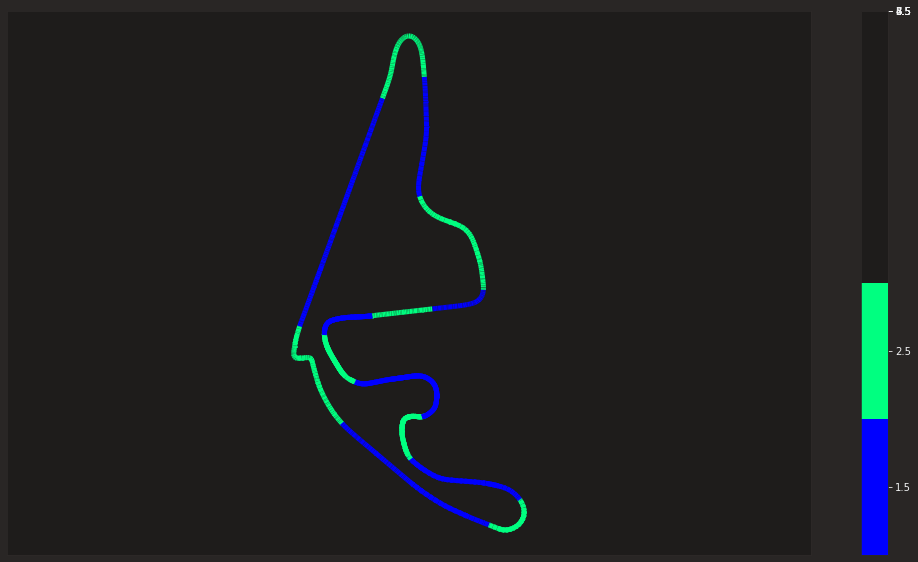

In [140]:

x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('winter', 2)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(['VER', 'HAM'])

plt.savefig(f"2021_ver_ham_q.png", dpi=300)

plt.show()

In [142]:
abu_dhabi_race.load();
laps_r = abu_dhabi_race.laps
laps_r.head() #data laps

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['33', '63', '6', '5', '99', '18', '10', '14', '7', '3', '22', '16', '77', '55', '11', '4', '44', '31', '47']


,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:54.885000,33,NaT,1,0 days 00:23:01.492000,NaT,NaT,0 days 00:00:38.428000,0 days 00:00:33.563000,NaT,0 days 01:03:21.366000,0 days 01:03:54.999000,290.0,299.0,215.0,318.0,False,SOFT,4.0,False,1,0 days 01:02:21.871000,Red Bull Racing,VER,1,False,2021-12-12 13:03:21.881
1,0 days 01:05:23.988000,33,0 days 00:01:29.103000,2,NaT,NaT,0 days 00:00:18.116000,0 days 00:00:38.026000,0 days 00:00:32.961000,0 days 01:04:13.001000,0 days 01:04:51.027000,0 days 01:05:23.988000,284.0,300.0,213.0,302.0,False,SOFT,5.0,False,1,0 days 01:03:54.885000,Red Bull Racing,VER,1,True,2021-12-12 13:04:54.895
2,0 days 01:06:52.815000,33,0 days 00:01:28.827000,3,NaT,NaT,0 days 00:00:17.999000,0 days 00:00:38.043000,0 days 00:00:32.785000,0 days 01:05:41.987000,0 days 01:06:20.030000,0 days 01:06:52.815000,286.0,300.0,212.0,301.0,False,SOFT,6.0,False,1,0 days 01:05:23.988000,Red Bull Racing,VER,1,True,2021-12-12 13:06:23.998
3,0 days 01:08:21.841000,33,0 days 00:01:29.026000,4,NaT,NaT,0 days 00:00:18.019000,0 days 00:00:38.125000,0 days 00:00:32.882000,0 days 01:07:10.834000,0 days 01:07:48.959000,0 days 01:08:21.841000,284.0,299.0,214.0,303.0,False,SOFT,7.0,False,1,0 days 01:06:52.815000,Red Bull Racing,VER,1,True,2021-12-12 13:07:52.825
4,0 days 01:09:50.559000,33,0 days 00:01:28.718000,5,NaT,NaT,0 days 00:00:17.999000,0 days 00:00:38.083000,0 days 00:00:32.636000,0 days 01:08:39.840000,0 days 01:09:17.923000,0 days 01:09:50.559000,285.0,300.0,215.0,303.0,False,SOFT,8.0,False,1,0 days 01:08:21.841000,Red Bull Racing,VER,1,True,2021-12-12 13:09:21.851


core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['33', '63', '6', '5', '99', '18', '10', '14', '7', '3', '22', '16', '77', '55', '11', '4', '44', '31', '47']


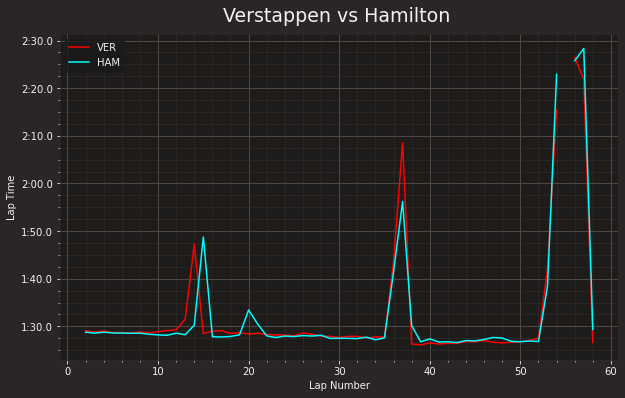

In [143]:
#comparación de vueltas entre VER Y HAM
laps = abu_dhabi_race.load_laps(with_telemetry=True)
ver = laps.pick_driver('VER')
ham = laps.pick_driver('HAM')
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ver['LapNumber'], ver['LapTime'], color='red')
ax.plot(ham['LapNumber'], ham['LapTime'], color='cyan')
ax.set_title("Verstappen vs Hamilton ")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plt.legend(['VER','HAM'])

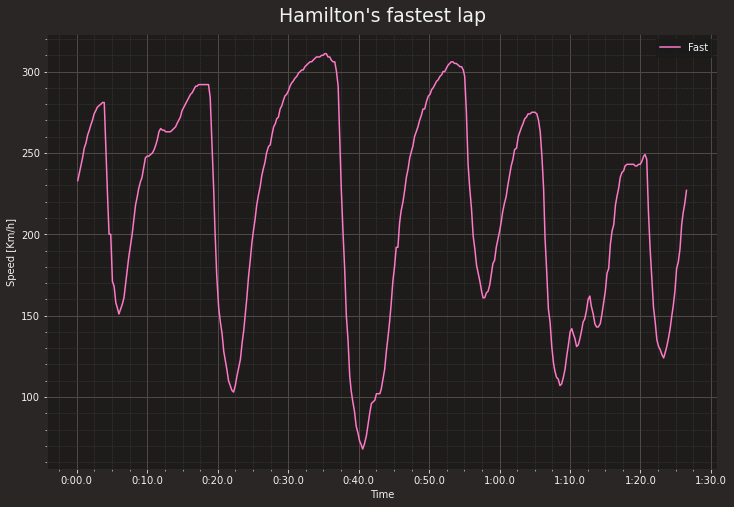

In [144]:
#vuelta más rápida de halmiton
ham_fastest_lap = laps_r.pick_driver('HAM').pick_fastest()
ham_car_data = ham_fastest_lap.get_car_data()
t = ham_car_data['Time']
velocity = ham_car_data['Speed']
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velocity, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Hamilton's fastest lap")
ax.legend()

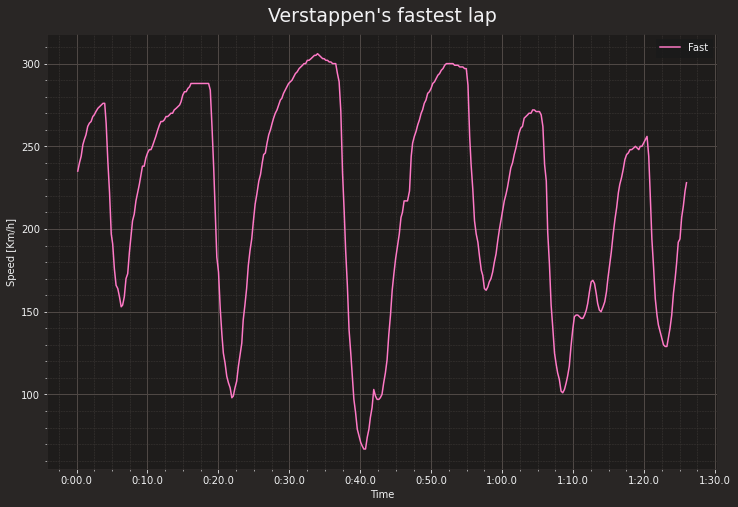

In [145]:
#Vuelta más rápida de Verstappen
ver_fastest_lap = laps_r.pick_driver('VER').pick_fastest()
ver_car_data = ver_fastest_lap.get_car_data()
t = ver_car_data['Time']
velocity = ver_car_data['Speed']
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velocity, label='Fast')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Verstappen's fastest lap")
ax.legend()

In [146]:
# Desarrollo de la temporada 2021

In [177]:
# Load the session data
race = ff1.get_session(2021, 'Abu Dhabi', 'R')

In [178]:
laps = race.load_laps(with_telemetry=True) #coges los datos de telemetría

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['33', '44', '55', '22', '10', '77', '4', '14', '31', '16', '5', '3', '18', '47', '11', '6', '99', '63', '7']


In [191]:
laps_ham = laps.pick_driver('HAM')
laps_ver = laps.pick_driver('VER')

In [192]:
laps_ham = laps_ham.loc[laps_ham['Stint'] == 1]
laps_ver = laps_ver.loc[laps_ver['Stint'] == 1]

In [193]:
laps_ham['RaceLapNumber'] = laps_ham['LapNumber'] - 1 #se resta 1 porque la primera vuelta es warm up
laps_ver['RaceLapNumber'] = laps_ver['LapNumber'] - 1

In [194]:
#como de cerca estaba verstappen de ham
full_distance_ver_ham = pd.DataFrame()
summarized_distance_ver_ham = pd.DataFrame()

In [195]:
for lap in laps_ver.iterlaps():
    telemetry = lap[1].get_car_data().add_distance().add_driver_ahead()
    
    # Only run this loop when driver ahead is HAM, otherwise we compare wrong distance gaps
    telemetry = telemetry.loc[telemetry['DriverAhead'] == "3"]
    
    if len(telemetry) != 0:
        # Full distance
        lap_telemetry = telemetry[['Distance', 'DistanceToDriverAhead']]
        lap_telemetry.loc[:, 'Lap'] = lap[0] + 1

        full_distance_ver_ham = full_distance_ver_ham.append(lap_telemetry)

        # Average / median distance
        distance_mean = np.nanmean(telemetry['DistanceToDriverAhead'])
        distance_median = np.nanmedian(telemetry['DistanceToDriverAhead'])

        summarized_distance_ver_ham = summarized_distance_ver_ham.append({
            'Lap': lap[0] + 1,
            'Mean': distance_mean,
            'Median': distance_median
        }, ignore_index = True)

In [ ]:
#ultima vuelta